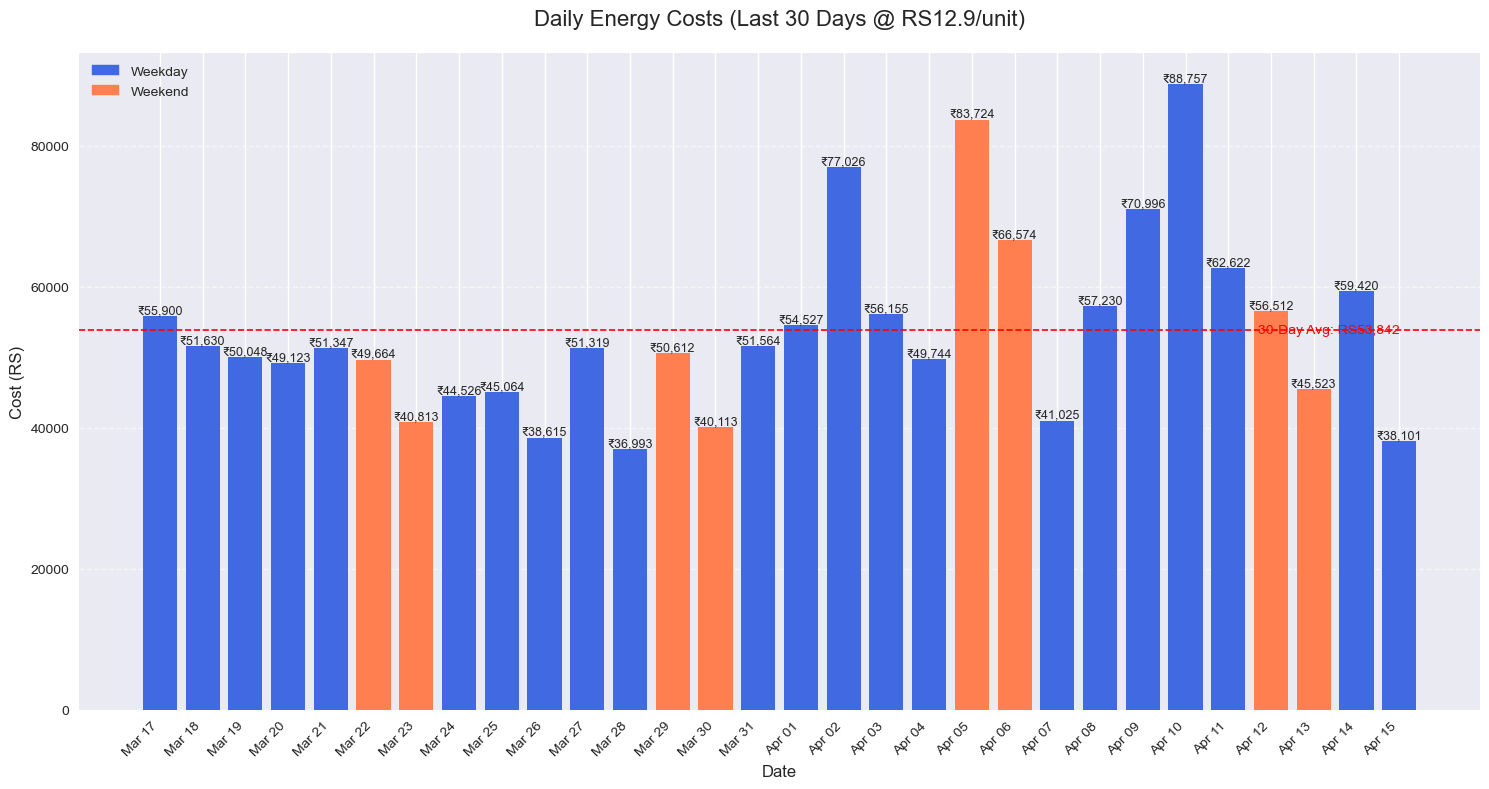

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.style.use('seaborn-v0_8')  # Use this for newer versions
plt.rcParams['figure.figsize'] = (15, 8)


file_path = "E:/final.csv"
df = pd.read_csv(file_path)
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y %H:%M')
df = df.sort_values('Datetime')


daily_consumption = df.resample('D', on='Datetime')['Consumption'].sum()
daily_cost = daily_consumption * 12.9  # ₹12.9 per unit

last_30_cost = daily_cost.tail(30)
x_dates = last_30_cost.index.strftime('%b %d')
x = range(len(last_30_cost))


fig, ax = plt.subplots()

# Weekday/weekend color coding
colors = ['royalblue' if date.weekday() < 5 else 'coral' for date in last_30_cost.index]
bars = ax.bar(x, last_30_cost.values, color=colors)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10,
            f'₹{height:,.0f}', ha='center', va='bottom', fontsize=9)

# Axis formatting
ax.set_title('Daily Energy Costs (Last 30 Days @ RS12.9/unit)', fontsize=16, pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cost (RS)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(x_dates, rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.6)


avg_cost = last_30_cost.mean()
ax.axhline(avg_cost, color='red', linestyle='--', linewidth=1.2)
ax.text(x[-1], avg_cost + 50, f'30-Day Avg: RS{avg_cost:,.0f}', 
        ha='right', va='center', color='red', fontsize=10)


weekday_patch = mpatches.Patch(color='royalblue', label='Weekday')
weekend_patch = mpatches.Patch(color='coral', label='Weekend')
ax.legend(handles=[weekday_patch, weekend_patch], loc='upper left')

plt.tight_layout()
plt.show()
